## Data Wrangling

Data wrangling is the process of `cleaning`  , `transforming` and `organizing` data so it can be used for `analysis and visualization` <br>


It is an important step in data analysis because raw data is often `incomplete` , `inconsistent` and and is `unstructured format` , which can make it difficult to work with <br>


> Data wrangling helps to make the data more consistent , accurate and useful for analysis and decision making

[Data Gethering](#gathering-the-data)\
[Data Assessing](#data-assessingeda)\
[data transformation](#transforming-the-data)\
[Data Organization](#organizing-the-dataset)

## Gathering the data

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [94]:
df =  sns.load_dataset('titanic')

In [95]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Data Assessing(EDA)

In [96]:
df.shape

(891, 15)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [98]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking the nul values

In [99]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

checking the percentage of the null values

In [100]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

**Note : ** 
Any column which have the null values more than 40% we \
should drop that column because it wil effect our result.

In [101]:
#dropping deck columns because it his the null values of 77 % 
df.drop(columns="deck", inplace = True)


lets see the deck column in df.columns 

In [102]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

checking the null values again

In [103]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

let us fill the null values of age columns first

In [104]:
df["age"]=df["age"].fillna(df["age"].median())

In [105]:
df.isnull().sum() / len(df) * 100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

filling the null values of embark_town and embarked

In [106]:
print(df.embark_town.mode())
print(df.embarked.mode())

0    Southampton
Name: embark_town, dtype: object
0    S
Name: embarked, dtype: object


lets do it

In [107]:
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])

In [108]:
df["embarked"] = df["embarked"].fillna(value=df["embarked"].mode()[0])
#df["age"]=df["age"].fillna(df["age"].median())

checking the null values again

In [109]:
df.isnull().sum() / len(df) * 100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

--------

### Correcting errors in data
    - outlier removal 
        - Visualization
        - IQR method
        - Z-Score method

#### Visualization method

<Axes: xlabel='sex', ylabel='age'>

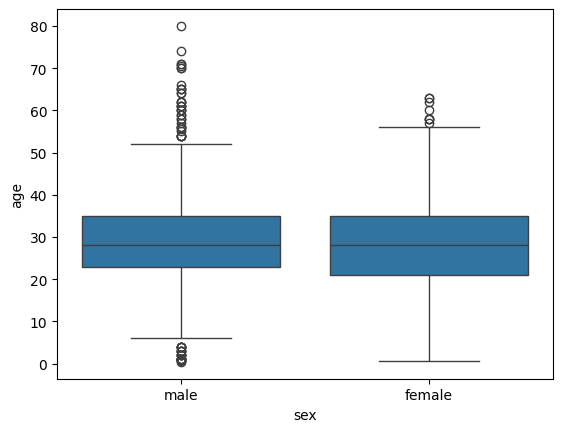

In [110]:
sns.boxplot(data=df, y="age", x="sex")

WE can see that any values above the 58 is an outlier

------------

In [111]:
df.shape

(891, 14)

#### IQR Method

In [112]:
Q1= df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)

IQR = Q3 - Q1

In [113]:
IQR

np.float64(13.0)

In [114]:
#defining the outliers
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR



removing the outliers of the age columns

In [115]:

#removing the outlier of the age columns
df = df[(df["age"]>lower_bound) & (df["age"]<upper_bound)]

checking the shape after having removed the outliers 
original shape (891,14)

In [116]:
df.shape

(825, 14)

removing the outliers of the fare column

In [117]:
Q1= df["fare"].quantile(0.25)
Q3 = df["fare"].quantile(0.75)

IQR = Q3 - Q1

In [118]:
#defining the outliers
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR


In [119]:
#removing the oultier of the fare column
df = df[(df["fare"]>lower_bound) & (df["fare"]<upper_bound)]

In [120]:
df.shape

(718, 14)

<Axes: xlabel='age', ylabel='Count'>

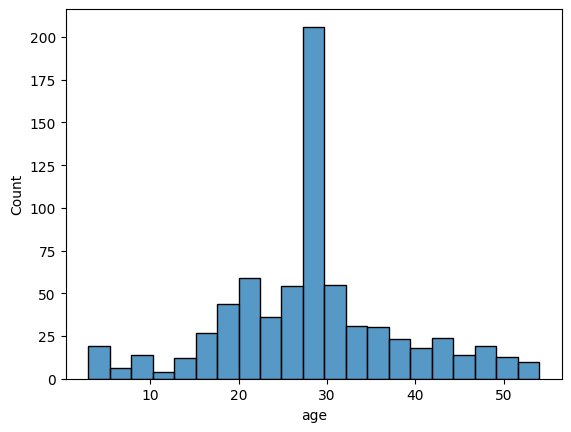

In [121]:
#checking the result by plot
sns.histplot(data=df, x="age")

<Axes: xlabel='fare', ylabel='Count'>

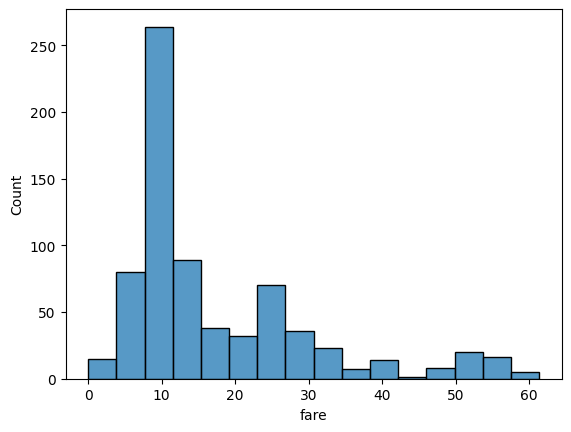

In [122]:
#checking the result by plot of fare column
sns.histplot(data=df, x="fare")

In [123]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


## Z-Score Method

we do this step with help from scipy stats and numpy

In [124]:
from scipy import stats
import numpy as np

In [125]:

# z_scores = np.abs(stats.zscore(df["age"]))
# data_no_outliers = df[(z_scores < 3).all(axis=1)]


------------

### finding and removing the duplicated values

In [126]:
df.shape

(718, 14)

In [127]:
df.duplicated()

0      False
2      False
3      False
4      False
5      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 718, dtype: bool

In [128]:
df.duplicated().sum()

np.int64(108)

In [129]:
duplicates = df[df.duplicated()]

So these rows are duplicated in the dataset

In [130]:
duplicates

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,28.0,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
55,1,1,male,28.0,0,0,35.5000,S,First,man,True,Southampton,yes,True
76,0,3,male,28.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,28.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,28.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
878,0,3,male,28.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,Southampton,no,True


removing the duplicated rows

In [131]:
df.drop_duplicates(inplace=True)

In [132]:
df.shape

(610, 14)

-----

## Transforming the data

### Data Normalization
> To bring data at one scale

Normalizing the data bringing the data to one scale \
This step is usually performed before removing the outliers\
**Remember** not every transformation is good for the data so if one of your normalizaion method doesn't work just go for the onother one.

### MinMax Scaler
this data normalization we are about to do is gonna is that it will bring the data to scale of 1 \
let say if a value was 20 before it will become 0.2 afterwards

this only change the scaling unit

In [133]:
# 1) importing the libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [134]:
#(min max scaling)

# 2) importing data
df

# 3) select columns to normalize
col_to_normalize  = ["age"]

# 4) Create the scaler function/tool
scaler = MinMaxScaler()

# 5) fit and transform the data on scaler or vice versa
df[col_to_normalize]=scaler.fit_transform(df[col_to_normalize])

# 6) check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372549,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,0.450980,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.627451,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.627451,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,0.490196,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.313725,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.490196,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.450980,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [42]:
#(min max scaling)

# 2) importing data
df

# 3) select columns to normalize
col_to_normalize  = ["age","fare"]

# 4) Create the scaler function/tool
scaler = MinMaxScaler()

# 5) fit and transform the data on scaler or vice versa
df[col_to_normalize]=scaler.fit_transform(df[col_to_normalize])

# 6) check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True
5,0,3,male,0.490196,0,0,0.137804,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,0.474509,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.490196,1,2,0.382051,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True


### Standard scaler

Standard scalar is a preprocessing too provided by the scikit learn library

it is used to standardlize features by removing mean and scaling to unit varaince

This is a common requirement for many machine learnign algorithms, as they may perform poorly if the individual feature do not resembles a standard normally distributed data(Gaussion with 0 mean and unit variance)\
It is useful when features of the dataset have different scales\
**uses**\
Gradient Descent Methods(algorithms like regression)\
Distance based algorithms (k-nearest neighbor(knn) etc)

scale of standard scaler is from 3 to -3

Equation : x - mean / std

In [43]:
# 1) importing the libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [44]:
#(min max scaling)

# 2) importing data
df

# 3) select columns to normalize
col_to_normalize  = ["age","fare"]

# 4) Create the scaler function/tool
scaler = StandardScaler()

# 5) fit and transform the data on scaler or vice versa
df[col_to_normalize]=scaler.fit_transform(df[col_to_normalize])

# 6) check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.571568,1,0,-0.815748,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.197874,0,0,-0.765779,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.642937,1,0,2.578422,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.642937,0,0,-0.756525,S,Third,man,True,Southampton,no,True
5,0,3,male,-0.011027,0,0,-0.726300,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,1.016631,0,5,0.803608,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.851838,0,0,0.868382,S,First,woman,False,Southampton,yes,True
888,0,3,female,-0.011027,1,2,0.383501,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.197874,0,0,0.868382,C,First,man,True,Cherbourg,yes,True


In [45]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,610.000000,610.000000,6.100000e+02,610.000000,610.000000,6.100000e+02
mean,0.360656,2.472131,4.193367e-16,0.463934,0.368852,6.406533e-17
std,0.480585,0.738376,1.000821e+00,0.896725,0.838335,1.000821e+00
min,0.000000,1.000000,-2.346613e+00,0.000000,0.000000,-1.352448e+00
25%,0.000000,2.000000,-6.416352e-01,0.000000,0.000000,-7.679405e-01
50%,0.000000,3.000000,-1.102703e-02,0.000000,0.000000,-3.900884e-01
75%,1.000000,3.000000,5.495136e-01,1.000000,0.000000,5.722714e-01
max,1.000000,3.000000,2.417982e+00,5.000000,6.000000,3.191311e+00


-_-_-_---------------------------------------------------------------------------------------------------------

### Log transformation

Transforming the data to log\
In this step we replace each value with with its log\
It is usally used to stabalize variance adn normalize the distribution in statistics(reduce  skewness of measurment variables)

If the data is near the 0 and we are using the log transformation we should use
```np.log1p```

In [88]:
import numpy as np

df['fare']= np.log(df['fare'])

c:\Users\khattak\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [89]:
df.describe()

c:\Users\khattak\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,survived,pclass,age,sibsp,parch,fare
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,0.360656,2.472131,0.492510,0.463934,0.368852,-inf
std,0.480585,0.738376,0.210054,0.896725,0.838335,NaN
min,0.000000,1.000000,0.000000,0.000000,0.000000,-inf
25%,0.000000,2.000000,0.357843,0.000000,0.000000,2.066331
50%,0.000000,3.000000,0.490196,0.000000,0.000000,2.564949
75%,1.000000,3.000000,0.607843,1.000000,0.000000,3.258097
max,1.000000,3.000000,1.000000,5.000000,6.000000,4.117071


-_-_---------------------------------------------------------------------------------------------------------------------

### Winsorization 
Winsorization is a statistical technique used ot reduce the influence of oultliers in a dataset. It involves replacing the extremes values in the data with less extreme values typically at specified percentiles theis make the dataset more roburst for analysis.
> Determine the percetiles (1 to 99)\
> replace vlues ( lower percentile with extreme lower values , upper percentile with extreme upper values)\
> Be carefull with the percentiles 

In [135]:
# winsorization using the scipy

from scipy.stats import mstats

# data
lower_perc = 5
upper_perc = 95

# applying the winsorization
df['fare'] = mstats.winsorize(df['fare'], limits=(lower_perc/100 , upper_perc/ 100))

In [136]:
df.describe()

c:\Users\khattak\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:4809: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\khattak\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:4809: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,survived,pclass,age,sibsp,parch,fare
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000
mean,0.360656,2.472131,0.492510,0.463934,0.368852,7.125
std,0.480585,0.738376,0.210054,0.896725,0.838335,0.000
min,0.000000,1.000000,0.000000,0.000000,0.000000,7.125
25%,0.000000,2.000000,0.357843,0.000000,0.000000,7.125
50%,0.000000,3.000000,0.490196,0.000000,0.000000,7.125
75%,1.000000,3.000000,0.607843,1.000000,0.000000,7.125
max,1.000000,3.000000,1.000000,5.000000,6.000000,7.125


_-_------------------------------------------------------------------------------------------------------------------------

___

# Organizing the dataset

Organizing the dataset is one of the most important step in the EDA it inlcudes `creating new columns`, `deleting useless columns` , `combining columns` ,`drawing relationship between the column`s and `renaming the columns and many more` .\
in order to make the data more sensible and understanding

### creating new columns
(creating column in order to distribute and organize data so it can be easily understood)

In [138]:
df['family_size'] = df['sibsp'] + df['parch']
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,7.125,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,7.125,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,7.125,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,7.125,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.490196,0,0,7.125,Q,Third,man,True,Queenstown,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,7.125,Q,Third,woman,False,Queenstown,no,False,5
887,1,1,female,0.313725,0,0,7.125,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,0.490196,1,2,7.125,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,0.450980,0,0,7.125,C,First,man,True,Cherbourg,yes,True,0


### removing columns
(removing the useless columns)

In [ ]:
df.drop(columns={'sibsp','parch'},inplace=True)

In [140]:
df

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,7.125,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,7.125,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,7.125,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,7.125,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.490196,7.125,Q,Third,man,True,Queenstown,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,7.125,Q,Third,woman,False,Queenstown,no,False,5
887,1,1,female,0.313725,7.125,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,0.490196,7.125,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,0.450980,7.125,C,First,man,True,Cherbourg,yes,True,0


### Renaming columns
(renaming a more sensible and related to the columns)

In [141]:
df = df.rename(columns={
    'sex' : 'gender'
    
})

In [142]:
df

,survived,pclass,gender,age,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,7.125,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,7.125,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,7.125,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,7.125,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.490196,7.125,Q,Third,man,True,Queenstown,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,7.125,Q,Third,woman,False,Queenstown,no,False,5
887,1,1,female,0.313725,7.125,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,0.490196,7.125,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,0.450980,7.125,C,First,man,True,Cherbourg,yes,True,0


### Creating a pivot tables
creating a pivot tables to understand the cross of 2 or 3 columns\
-> to analyze the relation between columns 



In [145]:
table = pd.pivot_table(df,values='fare', index='class',columns='survived', aggfunc=np.mean)
table

C:\Users\khattak\AppData\Local\Temp\ipykernel_4056\446794723.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = pd.pivot_table(df,values='fare', index='class',columns='survived', aggfunc=np.mean)
C:\Users\khattak\AppData\Local\Temp\ipykernel_4056\446794723.py:1: FutureWarning: The provided callable <function mean at 0x0000019028DBD3A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df,values='fare', index='class',columns='survived', aggfunc=np.mean)


survived,0,1
class,,
First,7.125,7.125
Second,7.125,7.125
Third,7.125,7.125


there are many aggfunc one can work with like np.sum etc
___